<a href="https://colab.research.google.com/github/Manass20/Airbnb-Booking-Analisys/blob/main/Manas_Ranjan_Behera_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [3]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

# NLP
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#word cloud
from wordcloud import WordCloud, ImageColorGenerator
sns.set_theme(style="ticks", color_codes=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/PROJECTS/EDA/Copy of Airbnb NYC 2019.csv')

In [6]:
# VIEW OF DATASET
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [7]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
df.shape

(48895, 16)

#*italicized text* *Shape of the dataset*

There are 48895 rows of data with 16 columns are present in the data frame.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Types of datas

*  There are 3 rows of dtype float.
*  There are 7 rows having dtype of integer
*  There are 6 columns having dtype of object type

In [10]:
# NULL value counts

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# NULL VALUES



*   There are 16 null values present in 'name' column.

*   There are 21 null values present in 'host_name' column.

*   There are 10052 null values present in 'last_review' column.

*   There are 10052 null values present in 'reviews_per_month' column.



In [11]:
# Calculating the %age of values missing from each column data

Total = df.isnull().sum().sort_values(ascending=False)

percentage = round((df.isnull().sum())*100/df.isnull().count().sort_values(ascending=False),2)

missing_val = pd.concat([Total,percentage],axis=1,keys = ['Total','Percentage'])

In [12]:
missing_val

,Total,Percentage
last_review,10052,20.56
reviews_per_month,10052,20.56
host_name,21,0.04
name,16,0.03
id,0,0.00
host_id,0,0.00
neighbourhood_group,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
longitude,0,0.00


There are a lot of row valus having missing values in 'last_review' and 'reviews_per_month' column.



*   so we have to remove the NAN valus with 'never'



In [13]:
# Replacing the  nan values of 'reviews_per_month' column wirh 0

df['reviews_per_month'].fillna(value=0,inplace=True)

##  'NA' value handling of 'last_review' column

In [14]:
df.last_review.fillna(value = 0,inplace= True)

In [15]:
df.last_review

0        2018-10-19
1        2019-05-21
2                 0
3        2019-07-05
4        2018-11-19
            ...    
48890             0
48891             0
48892             0
48893             0
48894             0
Name: last_review, Length: 48895, dtype: object

In [16]:
a=df[df['name'].isnull()]
a

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,0,0.00,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,0,0.00,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,0,0.00,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,0,0.00,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,0,0.00,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,0,0.00,5,0


*  These are the 16 rows having no name of property type.
*  Lets see the 'room_type' column if we get any idea to fill the NaN value.

In [17]:
# The 'room_type' column

a = df.groupby(['room_type']).count()
a

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,,,,,,
Entire home/apt,25409,25402,25409,25400,25409,25409,25409,25409,25409,25409,25409,25409,25409,25409,25409
Private room,22326,22318,22326,22314,22326,22326,22326,22326,22326,22326,22326,22326,22326,22326,22326
Shared room,1160,1159,1160,1160,1160,1160,1160,1160,1160,1160,1160,1160,1160,1160,1160


*  We see that there are only 3 type of data present in 'room_type' column.
*  So we can replace the NaN values of 'name' column with these values.

In [18]:
# We are filling the values of 'room type' column in 'name' column

df['name'].fillna(df['room_type'],inplace=True)


In [19]:
df.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

* we replaced the values with 'room_type' column data.

In [41]:
# Stopword removal
"""
1) download the nltk stopwords in english.
2) replace pantuation and special symbols.
3) make it string and convert all into lower case.
then split the words and compair each with the stopwords and keep only those which are not in stopword list.
"""

def stop_word_removal(df):
  stop = stopwords.words('english')
  df.name = df.name.str.replace("[^\w\s]", "").str.lower()
  df.name = df.name.apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [42]:
text = stop_word_removal(df)
text = " ".join(str(each) for each in df.name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [43]:
text

'clean quiet apt home park skylit midtown castle village harlemnew york cozy entire floor brownstone entire apt spacious studioloft central park large cozy 1 br apartment midtown east blissartsspace large furnished room near bway cozy clean guest room family apt cute cozy lower east side 1 bdrm beautiful 1br upper west side central manhattannear broadway lovely room 1 garden best area legal rental wonderful guest bedroom manhattan singles west village nest superhost 2 stops manhattan studio perfect parents garden chelsea perfect hip historic brownstone apartment backyard huge 2 br upper east cental park sweet spacious brooklyn loft cbg ctybgd helpshaiti rm114 cbg helps haiti room25 cbg helps haiti rm 2 maison des sirenes1bohemian apartment sunny bedroom across prospect park magnifique suite au n de manhattan vue cloitres midtown piedaterre spacious lovely furnished manhattan bedroom modern 1 br nyc east village front roomdouble bed spacious 1 bedroom luxe building loft williamsburg are

<Figure size 720x432 with 0 Axes>

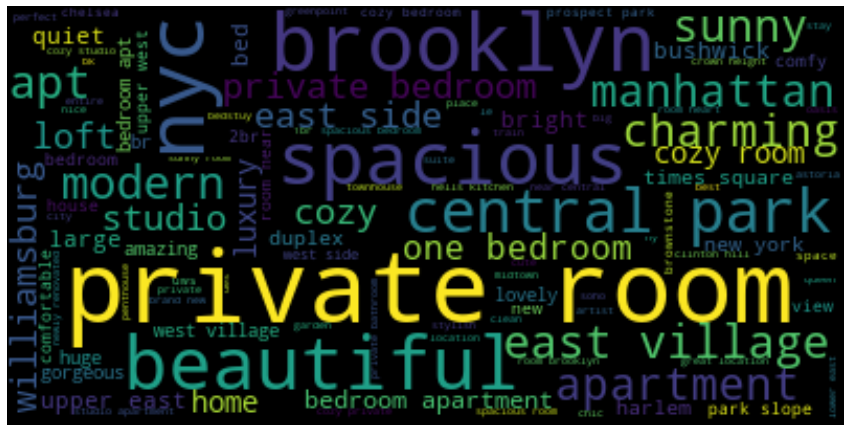

In [44]:
# wordcloud generator.
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=300, background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
pass

# This will show the most frequent words

# Top 50 words from word_cloud:

In [52]:
#list of words.

name_list = list(df.name.values)
words = []
for i in name_list:
  words+=i.split()

In [53]:
# let's see top 50 used words 
import collections
_top_50_words = collections.Counter(words).most_common()
_top_50_words = _top_50_words[0:50]

In [54]:
# DataFrame of top 50 words in df
top_50_words = pd.DataFrame(_top_50_words,columns=['Words','Frequency'])
top_50_words

,Words,Frequency
0,room,10051
1,bedroom,7606
2,private,7183
3,apartment,6698
4,cozy,5000
5,apt,4619
6,brooklyn,4055
7,studio,3991
8,spacious,3729
9,1,3518


# Next we will visualize with the data

[Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '2'),
 Text(0, 0, 'park'),
 Text(0, 0, 'east'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'williamsburg'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'village'),
 Text(0, 0, 'nyc'),
 Text(0, 0, 'heart'),
 Text(0, 0, 'large'),
 Text(0, 0, 'loft'),
 Text(0, 0, 'home'),
 Text(0, 0, 'modern'),
 Text(0, 0, 'central'),
 Text(0, 0, 'bright'),
 Text(0, 0, 'luxury'),
 Text(0, 0, '1br'),
 Text(0, 0, 'location'),
 Text(0, 0, 'west'),
 Text(0, 0, 'w'),
 Text(0, 0, 'new'),
 Text(0, 0, 'bed'),
 Text(0, 0, 'side'),
 Text(0, 0, 'charming'),
 Text(0, 0, 'bushwick'),
 Text(0, 0, 'upper'),
 Text(0, 0, 'midtown'),
 Text(0, 0, 'quiet'),
 Text(0, 0, 'one'),
 Text(0, 0, 'brownstone'),
 Text(0, 0, 'great'),
 Text(0, 0, 'br'),
 Text(0, 0, 'ha

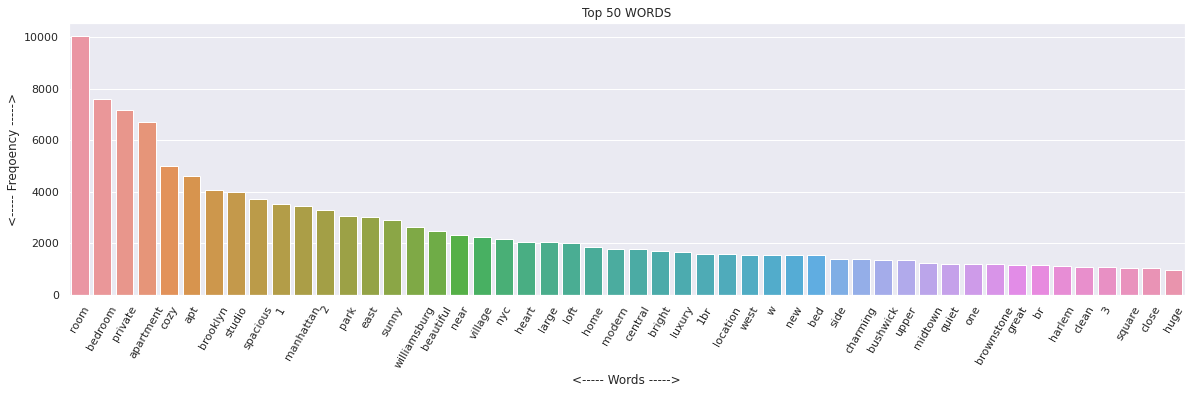

In [55]:
# Using barplot

sns.set_style('darkgrid')
plt.figure(figsize=(20,5))
p = sns.barplot(x='Words',y='Frequency',data= top_50_words)
p.set_title('Top 50 WORDS')
p.set_xlabel('<----- Words ----->')
p.set_ylabel('<----- Freqoency ----->')
p.set_xticklabels(p.get_xticklabels(), rotation=60)

*  We can see the occurance of words in the above graph .
*  These words can he help full in model buliding point of view.

# Column no 2 ie. host_name

In [64]:
df.host_name.nunique()

11452

#3) column_no_3 neighbourhood_group:

In [66]:
df['neighbourhood_group']

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object

In [67]:
# Find the unique names
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

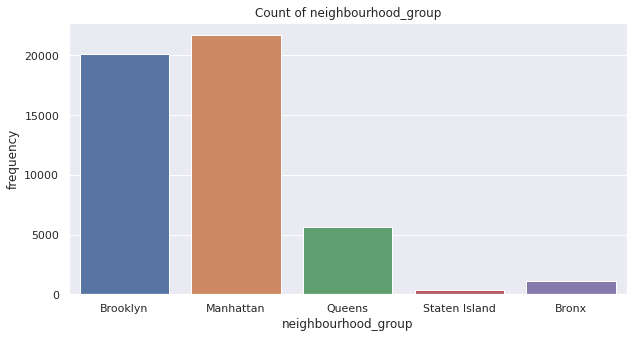

In [68]:
#count_plot
plt.figure(figsize=(10,5))
ax_3 = sns.countplot(x='neighbourhood_group',data = df)
ax_3.set_title('Count of neighbourhood_group')
ax_3.set_ylabel('frequency')
ax_3.set_xlabel('neighbourhood_group')
plt.show()